# Inference Only

# CATS and DOGS
# Binary Classification of Images - 2023 AI Summer School
## Last update: 14 June 2023


## See tutorials at
## https://www.tensorflow.org/tutorials

## Import TensorFlow and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print(tf.__version__)

C:\Users\Anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.12.0


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num GPUs Available:  0
Num CPUs Available:  1


### For Apple ARM64 machines only
### If necessary, disable the GPU in order to get rid of the NUMA error when it occurs

In [3]:
##tf.config.experimental.set_visible_devices([], 'GPU')
## 
##
##
## The following is from https://www.tensorflow.org/api_docs/python/tf/config/set_visible_devices
physical_devices = tf.config.list_physical_devices('GPU')
###try:
###  # Disable first GPU
###  ## see https://www.tensorflow.org/guide/gpu and gpus[0]
###  tf.config.set_visible_devices(physical_devices[1:], 'GPU')  ## disable GPU 0 by skipping physical_devices[0]
###  ## because Apple GPU is failing with RandomFlip (27 June 2022), for Apple ARM64 machines only. 
###  logical_devices = tf.config.list_logical_devices('GPU')
###  print("Logical device was not created for first GPU")
###  assert len(logical_devices) == len(physical_devices) - 1
###except:
###  print("Invalid device or cannot modify virtual devices once initialized.")
###  pass

You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [4]:
class_names = ['cats', 'dogs']  ## No training dataset here
print(class_names)

['cats', 'dogs']


In [5]:
#model=Sequential() Sequential has no method called load or load_model
#model.load_model("model_number01_Conv2D_32_64_128_Dense_64_16_1")
model = keras.models.load_model("dylan_model_v2")

## Model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     2

# Do Inference
# Run the model on 10 images

In [7]:
from PIL import Image

img_height = 256   ## see resize_all_to_256_256.py 
img_width = 256
desired_size = 256  ## assuming that the final size is a square 

### Try on 10 images from competition_cats_vs_dogs_setxx


Inferring the type of image #0
(312, 500)
(256, 256)


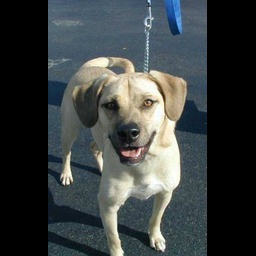

(1, 256, 256, 3)
1/1 [==============================] - 0s 222ms/step
[0.49855563]
Image #0 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #1
(120, 174)
(256, 256)


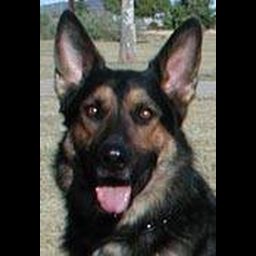

(1, 256, 256, 3)
1/1 [==============================] - 0s 46ms/step
[0.49855563]
Image #1 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #2
(240, 320)
(256, 256)


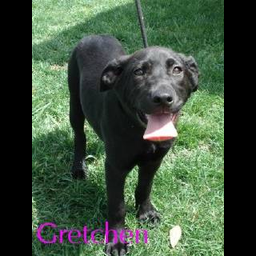

(1, 256, 256, 3)
1/1 [==============================] - 0s 64ms/step
[0.49855563]
Image #2 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #3
(500, 399)
(256, 256)


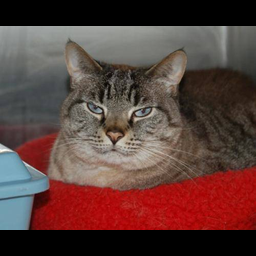

(1, 256, 256, 3)
1/1 [==============================] - 0s 66ms/step
[0.49855563]
Image #3 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #4
(499, 375)
(256, 256)


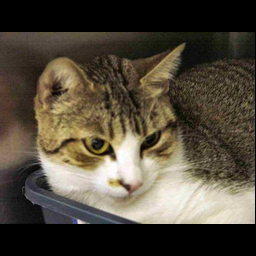

(1, 256, 256, 3)
1/1 [==============================] - 0s 49ms/step
[0.49855563]
Image #4 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #5
(350, 468)
(256, 256)


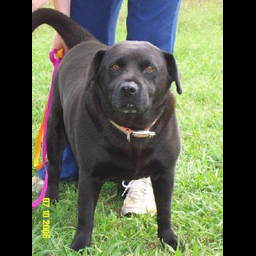

(1, 256, 256, 3)
1/1 [==============================] - 0s 49ms/step
[0.49855563]
Image #5 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #6
(499, 376)
(256, 256)


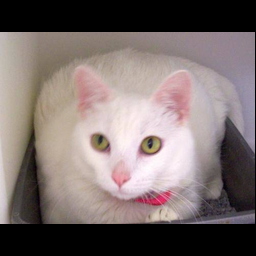

(1, 256, 256, 3)
1/1 [==============================] - 0s 49ms/step
[0.49855563]
Image #6 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #7
(499, 397)
(256, 256)


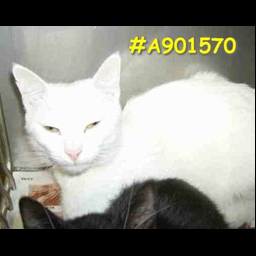

(1, 256, 256, 3)
1/1 [==============================] - 0s 50ms/step
[0.49855563]
Image #7 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #8
(499, 402)
(256, 256)


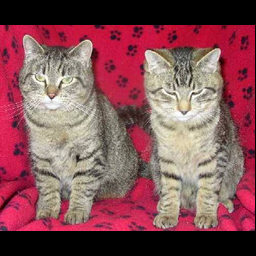

(1, 256, 256, 3)
1/1 [==============================] - 0s 50ms/step
[0.49855563]
Image #8 most likely belongs to cats with a 50.14 percent confidence.

Inferring the type of image #9
(500, 478)
(256, 256)


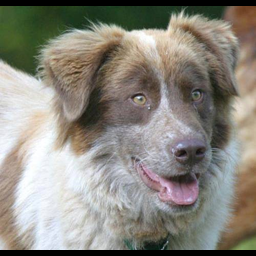

(1, 256, 256, 3)
1/1 [==============================] - 0s 49ms/step
[0.49855563]
Image #9 most likely belongs to cats with a 50.14 percent confidence.


In [8]:
for image_index in range(10):
    print("\nInferring the type of image #%d" % (image_index))
    image_name="competition_cats_vs_dogs_set00/image%d.jpg" % (image_index)
    im=Image.open(image_name)
    old_size=im.size
    if old_size != (desired_size,desired_size):
       ratio = float(desired_size)/max(old_size)
       new_size = tuple([int(x*ratio) for x in old_size])
       im = im.resize(new_size, Image.Resampling.LANCZOS)  ## Image.ANTIALIAS
       new_im = Image.new("RGB", (desired_size, desired_size))
       new_im.paste(im, ((desired_size-new_size[0])//2, (desired_size-new_size[1])//2))
    else:
       new_im=im
    print(old_size)
    print(new_im.size)
    display(new_im)
    img_array = tf.keras.utils.img_to_array(new_im)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    print(img_array.shape)
    predictions = model.predict(img_array)
    score = predictions[0]   ## no need for softmax() 
    print(score)
    print("Image #%d most likely belongs to %s with a %1.2f percent confidence."
           % (image_index,class_names[round(score[0])], 100 * np.max((score[0],1-score[0]))))